### 필요 package&module import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from basic_image_eda import BasicImageEDA

In [2]:
df = pd.read_csv('data/train.csv')
meta = pd.read_csv('data/meta.csv')

In [3]:
meta.head()

,target,class_name
0,0,account_number
1,1,application_for_payment_of_pregnancy_medical_e...
2,2,car_dashboard
3,3,confirmation_of_admission_and_discharge
4,4,diagnosis


In [4]:
df.head()

,ID,target
0,002f99746285dfdd.jpg,16
1,008ccd231e1fea5d.jpg,10
2,008f5911bfda7695.jpg,10
3,009235e4c9c07af5.jpg,4
4,00b2f44967580c74.jpg,16


In [5]:
train_label = df.merge(meta, on='target', how='left')

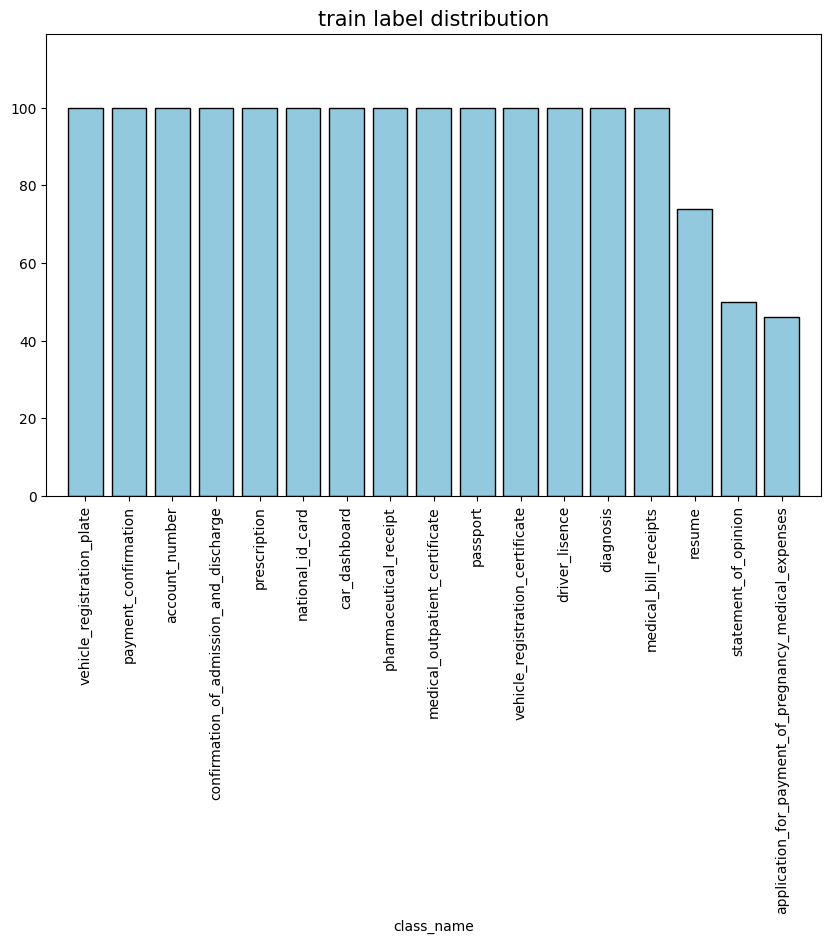

In [6]:
plt.figure(figsize=(10,6))
s = train_label['class_name'].value_counts()

sns.barplot(x=s.index, y=s.values, color="skyblue", edgecolor='black')
plt.title("train label distribution", fontsize=15)
plt.ylim(0, 119)
plt.margins(x=0.03)
plt.xticks(rotation=90)
plt.savefig('visualization/train_label_distribution.png', bbox_inches='tight')
# plt.show()

In [7]:
s

class_name
vehicle_registration_plate                               100
payment_confirmation                                     100
account_number                                           100
confirmation_of_admission_and_discharge                  100
prescription                                             100
national_id_card                                         100
car_dashboard                                            100
pharmaceutical_receipt                                   100
medical_outpatient_certificate                           100
passport                                                 100
vehicle_registration_certificate                         100
driver_lisence                                           100
diagnosis                                                100
medical_bill_receipts                                    100
resume                                                    74
statement_of_opinion                                      50
application_f

### 이미지 넓이, 길이 시각화, RGB 픽셀분포 시각화

In [8]:
# 기존 eda 모듈 사용
# https://github.com/Soongja/basic-image-eda?tab=readme-ov-file
# pip install basic-image-eda
# pip install scikit-image

In [9]:
def width_height_df(img_folder):
    """
    이미지 넓이와 길이 분포 시각화를 위한 dataframe 생성
    """
    widths, heights = [], []
    for f in os.listdir(img_folder):
        im = Image.open(os.path.join(img_folder, f))
        widths.append(im.width)
        heights.append(im.height)

    df = pd.DataFrame(data = list(zip(widths, heights)), columns = ["widths", "heights"])
    return df    

In [10]:
wh_tr = width_height_df("data/train")
wh_tst = width_height_df("data/test")

In [11]:
wh_tst

,widths,heights
0,648,404
1,443,591
2,591,443
3,443,591
4,443,591
...,...,...
3135,591,443
3136,619,423
3137,591,443
3138,443,591


In [12]:
extensions = ['png', 'jpg', 'jpeg']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0


found 1570 images.
Using 64 threads. (max:64)



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1570/1570 [00:06<00:00, 237.70it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  1570

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  348
max height                               |  682
mean height                              |  538.1694267515924
median height                            |  591

min width                                |  384
max width                                |  753
mean width                               |  497.61337579617833
median width                             |  443

mean height/width ratio                  |  1.0815011270356722
median height/width ratio                |  1.3340857787810383
recommended input size(by mean)          |  [536 496] (h x w, multiples of 8)
recommended input size(by mean)          |  [544 496] (h x w, multiples of 16)
recommended

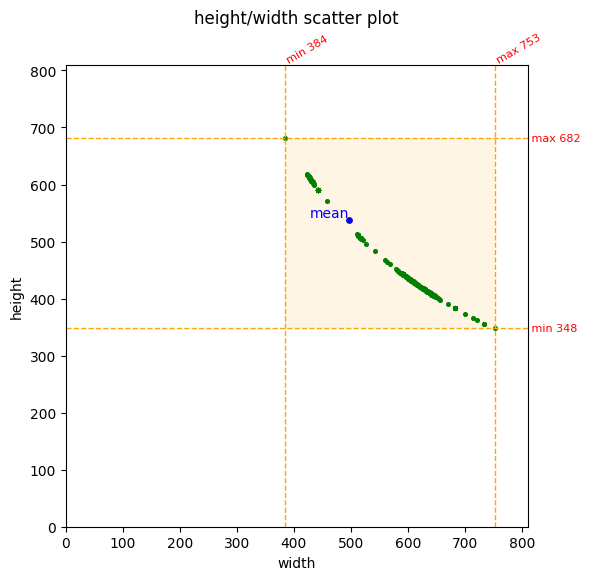

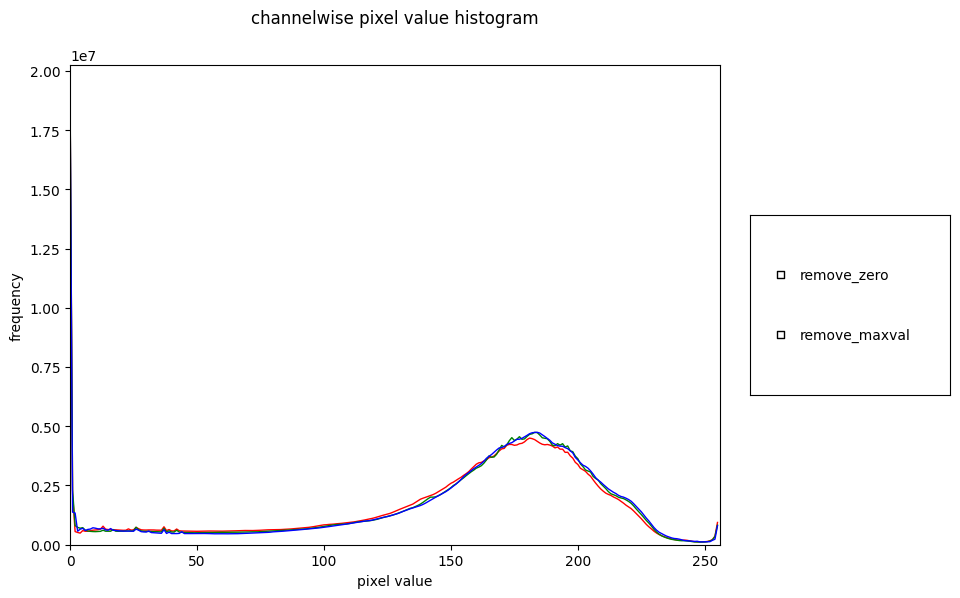

{'dtype': 'uint8',
 'channels': [3],
 'extensions': ['jpg'],
 'min_h': 348,
 'max_h': 682,
 'mean_h': 538.1694267515924,
 'median_h': 591,
 'min_w': 384,
 'max_w': 753,
 'mean_w': 497.61337579617833,
 'median_w': 443,
 'mean_hw_ratio': 1.0815011270356722,
 'median_hw_ratio': 1.3340857787810383,
 'rec_hw_size_8': array([536, 496]),
 'rec_hw_size_16': array([544, 496]),
 'rec_hw_size_32': array([544, 512]),
 'mean': array([0.57420594, 0.5831464 , 0.58801717], dtype=float32),
 'std': array([0.24630105, 0.24631798, 0.24568725], dtype=float32)}

In [13]:
# train
data_dir = "data/train"
BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)


found 3140 images.
Using 64 threads. (max:64)



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3140/3140 [00:13<00:00, 239.36it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  3140

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  343
max height                               |  763
mean height                              |  518.5563694267516
median height                            |  535

min width                                |  343
max width                                |  763
mean width                               |  517.0850318471338
median width                             |  489

mean height/width ratio                  |  1.0028454460852636
median height/width ratio                |  1.0940695296523517
recommended input size(by mean)          |  [520 520] (h x w, multiples of 8)
recommended input size(by mean)          |  [512 512] (h x w, multiples of 16)
recommended 

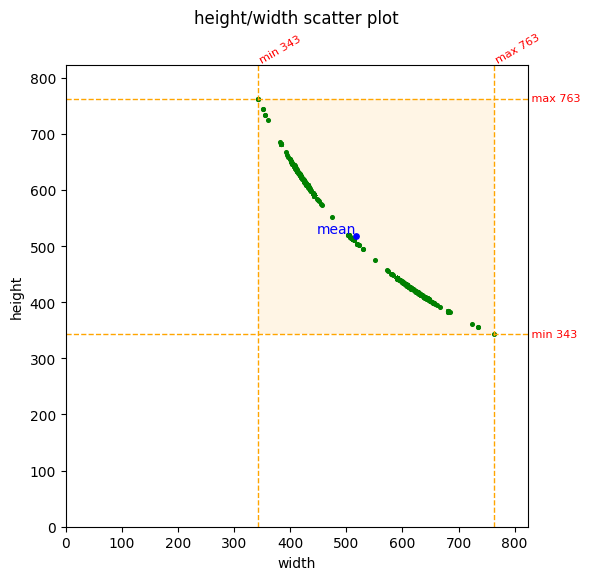

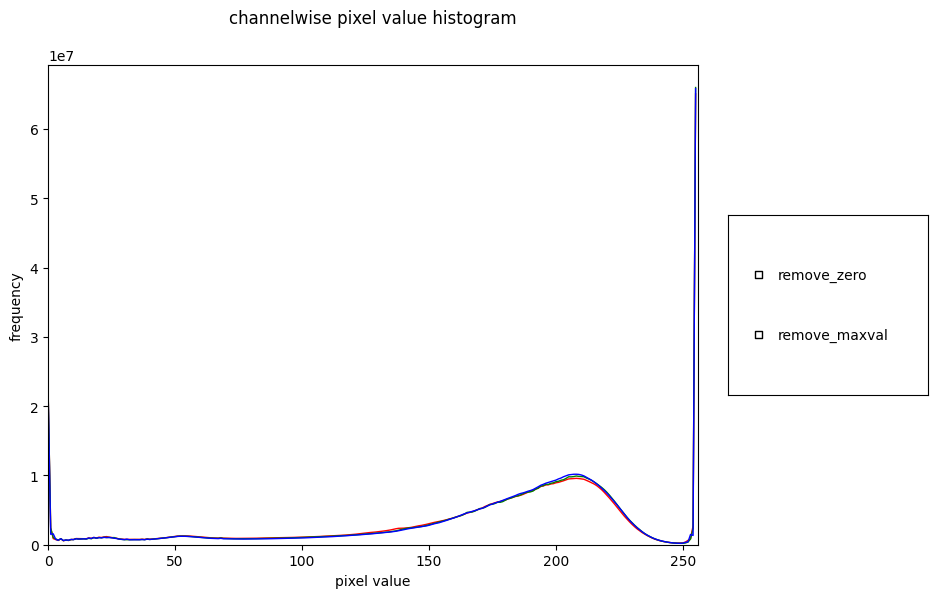

{'dtype': 'uint8',
 'channels': [3],
 'extensions': ['jpg'],
 'min_h': 343,
 'max_h': 763,
 'mean_h': 518.5563694267516,
 'median_h': 535,
 'min_w': 343,
 'max_w': 763,
 'mean_w': 517.0850318471338,
 'median_w': 489,
 'mean_hw_ratio': 1.0028454460852636,
 'median_hw_ratio': 1.0940695296523517,
 'rec_hw_size_8': array([520, 520]),
 'rec_hw_size_16': array([512, 512]),
 'rec_hw_size_32': array([512, 512]),
 'mean': array([0.6708205, 0.6763196, 0.6789443], dtype=float32),
 'std': array([0.25132865, 0.2501821 , 0.2485806 ], dtype=float32)}

In [14]:
# test
data_dir = "data/test"
BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)